SET100 Data: Feature Set 02

Use class StockFS as container for each stock.  


Eikon data  
Price	MV	VA	VO	DY  

Join with Sector data  
Ticker	Sector	Industry  

Merge with YahooFinance  
High	Low	Open	Close	Volume	Adj Close


134999 rows × 99 columns   _fs2.csv.gz 
80M	_fs2.csv.gz  
110 stocks with observations count greater than 1000.  


Error AWC: single positional indexer is out-of-bounds  
Error U: single positional indexer is out-of-bounds  

In [1]:
import sys, os, os.path
if not 'EXPERIMENT_HOME' in os.environ: # Configure local paths if not already defined
    ML_HOME = os.path.abspath(os.path.join("..", "ml_home")) # ML workspace
    EXPERIMENT_HOME = os.path.abspath(os.path.join(ML_HOME, "..")) # Experiment workspace
    DATA_HOME = os.path.abspath(os.path.join(EXPERIMENT_HOME,"dataset")) # Dataset location
    os.environ["EXPERIMENT_HOME"] = EXPERIMENT_HOME
    os.environ["DATA_HOME"] = DATA_HOME
    sys.path.insert(0, EXPERIMENT_HOME)
    sys.path.insert(0, ML_HOME) # Add to path so can load our library
    os.chdir(EXPERIMENT_HOME) # Change working directory to experiment workspace
print("Experiment Home: ", os.path.abspath(os.curdir), "; Data Home:", DATA_HOME)

Experiment Home:  /home/jovyan ; Data Home: /home/jovyan/dataset


In [2]:
from datetime import datetime
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import xlrd
import matplotlib.pyplot as plt
from preprocessing import add_feature_set_1, add_feature_set_2
%matplotlib inline


In [3]:
os.chdir("/home/jovyan/dataset/set100.data")
stocks = pd.read_csv('_directory.csv', index_col=0)
print("Stocks count:", len(stocks))
stocks.tail()

Stocks count: 150


,company_name,industry,sector,symbol
ticker,,,,
VIBHA,VIBHAVADI MEDICAL CENTER PUBLIC COMPANY LIMITED,Services,Health Care Services,VIBHA
VNG,VANACHAI GROUP PUBLIC COMPANY LIMITED,Property & Construction,Construction Materials,VNG
WHA,WHA CORPORATION PUBLIC COMPANY LIMITED,Property & Construction,Property Development,WHA
WHAUP,WHA UTILITIES AND POWER PUBLIC COMPANY LIMITED,Resources,Energy & Utilities,WHAUP
WORK,WORKPOINT ENTERTAINMENT PUBLIC COMPANY LIMITED,Services,Media & Publishing,WORK


In [4]:
period_start='2014-01-01'
period_end='2019-12-31'
series = {}
for s in stocks.symbol.values:
    df = pd.read_csv("%s.csv" % s, index_col=0)
    # Add column ticker
    df.loc[:,('Date')] = df.index
    df['Ticker'] = s
    
    # Add sector column
    sector = stocks[stocks['symbol']==s].sector.values[0]
    df['Sector'] = sector

    # Add industry column
    industry = stocks[stocks['symbol']==s].industry.values[0]
    df['Industry'] = industry
    
    # Drop NaN rows: these are VA, VO for holidays
    df.dropna(inplace=True)
    
    # Add to dictionary
    series[s] = df[period_start:period_end]

In [5]:
# Select single stock series for QC  
ticker = "SCB"
df = series[ticker]
df.index = pd.to_datetime(df.index)
df

,Price,MV,VA,VO,DY,Date,Ticker,Sector,Industry
Date,,,,,,,,,
2014-01-02,131.5,446312.2,2001558.0,14727.9,3.80,2014-01-02,SCB,Banking,Financials
2014-01-03,132.5,449706.3,2051395.0,15411.3,3.77,2014-01-03,SCB,Banking,Financials
2014-01-06,140.0,475161.3,1740385.0,12798.9,3.57,2014-01-06,SCB,Banking,Financials
2014-01-07,144.0,488737.4,1322406.0,9353.2,3.47,2014-01-07,SCB,Banking,Financials
2014-01-08,140.5,476858.3,1526183.0,10750.7,3.56,2014-01-08,SCB,Banking,Financials
...,...,...,...,...,...,...,...,...,...
2019-12-24,118.5,402376.1,1040197.0,8809.8,4.64,2019-12-24,SCB,Banking,Financials
2019-12-25,119.5,405771.6,457841.1,3841.8,4.60,2019-12-25,SCB,Banking,Financials
2019-12-26,119.0,404073.9,630049.9,5295.4,4.62,2019-12-26,SCB,Banking,Financials


In [6]:
# Stack dataframes together
# https://stackoverflow.com/questions/29351840/stack-two-pandas-data-frames
rows = []
for k, d in series.items():
    rows.append(d)
df = pd.concat(rows, ignore_index=True)
df

,Price,MV,VA,VO,DY,Date,Ticker,Sector,Industry
0,3.44,16683.99,65373.3,19045.1,0.00,2014-01-02,AAV,Transportation & Logistics,Services
1,3.42,16586.99,34585.3,10163.8,0.00,2014-01-03,AAV,Transportation & Logistics,Services
2,3.54,17168.99,41467.2,11936.8,0.00,2014-01-06,AAV,Transportation & Logistics,Services
3,3.72,18041.99,92143.9,25572.0,0.00,2014-01-07,AAV,Transportation & Logistics,Services
4,3.64,17653.99,57568.1,15618.6,0.00,2014-01-08,AAV,Transportation & Logistics,Services
...,...,...,...,...,...,...,...,...,...
208726,13.40,5916.91,43853.1,3283.1,3.36,2019-12-24,WORK,Media & Publishing,Services
208727,13.60,6005.22,25806.5,1918.2,3.31,2019-12-25,WORK,Media & Publishing,Services
208728,13.90,6137.69,26514.5,1907.0,3.24,2019-12-26,WORK,Media & Publishing,Services
208729,14.10,6226.00,22389.9,1587.2,3.19,2019-12-27,WORK,Media & Publishing,Services


In [7]:
# Pivot table: Value=Price
ptable = df.pivot_table(values='Price', index='Date', columns=['Industry', 'Sector', 'Ticker'])
ptable

Industry   Agro & Food Industry                                            \
Sector             Agribusiness        Food & Beverage                      
Ticker                     GFPT    STA             CBG    CPF  ICHI  KTIS   
Date                                                                        
2014-01-02                 12.2  11.95             NaN  30.50   NaN   NaN   
2014-01-03                 12.0  11.56             NaN  30.50   NaN   NaN   
2014-01-06                 11.9  11.47             NaN  29.25   NaN   NaN   
2014-01-07                 12.2  11.95             NaN  30.50   NaN   NaN   
2014-01-08                 12.0  12.14             NaN  29.75   NaN   NaN   
...                         ...    ...             ...    ...   ...   ...   
2019-12-24                 12.0   9.75           83.25  27.75  4.78  4.12   
2019-12-25                 11.9   9.80           82.75  27.75  4.82  4.16   
2019-12-26                 12.1   9.95           83.75  27.75  5.00  4.18   
2019-12-27                 12.4  10.10           84.50  27.50  4.92  4.16   
2019-12-30                 12.3  10.00           84.00  27.50  5.05  4.20   

Industry                                ...            Technology  \
Sector                                  ... Electronic Components   
Ticker          M  MALEE   MINT    OSP  ...                   SVI   
Date                                    ...                         
2014-01-02  48.25  14.62  17.01    NaN  ...                  4.00   
2014-01-03  48.75  15.37  16.75    NaN  ...                  4.10   
2014-01-06  48.00  15.12  18.00    NaN  ...                  3.94   
2014-01-07  48.75  16.12  18.80    NaN  ...                  4.06   
2014-01-08  49.50  15.87  18.18    NaN  ...                  4.02   
...           ...    ...    ...    ...  ...                   ...   
2019-12-24  68.75   6.55  35.21  39.75  ...                  3.42   
2019-12-25  70.00   6.55  35.21  39.75  ...                  3.46   
2019-12-26  69.00   6.60  35.21  40.00  ...                  3.50   
2019-12-27  70.00   6.60  35.21  40.25  ...                  3.56   
2019-12-30  70.50   6.50  35.46  40.50  ...                  3.60   

Industry                                                                     \
Sector     Information & Communication Technology                             
Ticker                                     ADVANC   DTAC INTUCH   JAS JMART   
Date                                                                          
2014-01-02                                  187.0  93.00  64.00  5.59  8.18   
2014-01-03                                  196.0  92.50  65.50  5.41  7.92   
2014-01-06                                  201.0  95.25  66.00  5.72  7.92   
2014-01-07                                  210.0  96.25  67.75  5.90  7.80   
2014-01-08                                  206.0  98.00  67.50  5.86  7.92   
...                                           ...    ...    ...   ...   ...   
2019-12-24                                  215.0  54.00  57.75  5.00  7.80   
2019-12-25                                  215.0  53.25  57.50  5.00  8.05   
2019-12-26                                  215.0  53.75  57.50  4.98  8.30   
2019-12-27                                  214.0  53.25  57.25  4.98  8.25   
2019-12-30                                  213.0  53.25  57.25  5.00  8.35   

Industry                               
Sector                                 
Ticker     SAMART SAMTEL  THCOM  TRUE  
Date                                   
2014-01-02  14.00  12.10  38.00  5.90  
2014-01-03  14.10  11.70  36.75  5.82  
2014-01-06  14.90  12.00  36.25  5.99  
2014-01-07  14.80  12.40  36.75  6.17  
2014-01-08  14.20  12.30  35.50  5.90  
...           ...    ...    ...   ...  
2019-12-24   6.80   7.90   3.84  4.64  
2019-12-25   6.85   7.90   3.84  4.62  
2019-12-26   6.80   7.90   3.78  4.66  
2019-12-27   6.80   7.90   3.76  4.62  
2019-12-30   6.80   7.95   3.86  4.60  

[1465 rows x 150 colu

# Enrich each stock with data and features

In [8]:
class StockFS2:
    """Feature set 2"""
    def __init__(self, ticker):
        self.ticker = ticker
        df = series[ticker]
        df.index = pd.to_datetime(df.index)
        self.df = df
        
        self.outfile = "%s_FS2.csv" % self.ticker
        
        # YahooFinance
        self.merge_yahoofinance()
        self.df.dropna(inplace=True)
        
        # Add Feature Set 02
        self.df = add_feature_set_2(self.df)
        
        period_start='2015-01-01'
        period_end='2019-12-31'
        self.df = self.df[period_start:period_end]
        
    def merge_yahoofinance(self):
        symbol = self.ticker
        if symbol == 'GOLD': # Exception: change to FPT
            symbol = 'FPT'
        srcfile = os.path.join(DATA_HOME,"historical","%s.csv" % symbol)
        df_yahoo = pd.read_csv(srcfile)
        df_yahoo = df_yahoo.set_index('Date')
        df_yahoo.index = pd.to_datetime(df_yahoo.index)
        
        # 
        # df_res = self.df.merge(df_yahoo, left_on=self.df.index, right_on=df_yahoo.index)
        # df_res = df_res.set_index('key_0')
        # df_res.index.rename('Date', inplace=True)
        
        df_res = pd.merge(left=self.df,right=df_yahoo,how='left',left_on=self.df.index, right_on=df_yahoo.index)
        df_res['idx'] = df_res['Date']
        df_res = df_res.set_index('idx')
        df_res.index.rename('Date', inplace=True)
        self.df = df_res
        return True
    
    def save_features(self):
        self.df.to_csv(self.outfile)

In [9]:
symbol = 'SCB'
df1 = series[symbol]
srcfile = os.path.join(DATA_HOME,"historical","%s.csv" % symbol)
df_yahoo = pd.read_csv(srcfile)
df_yahoo = df_yahoo.set_index('Date')
df_yahoo.index = pd.to_datetime(df_yahoo.index)

# This produce duplicate rows
# df_res = df1.merge(df_yahoo, left_on=df1.index, right_on=df_yahoo.index)
# df_res = df_res.set_index('key_0')
# df_res.index.rename('Date', inplace=True)
# df_res

# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
# pd.concat([df1, df_yahoo], join='inner', axis=0)
df_res = pd.merge(left=df1,right=df_yahoo,how='left',left_on=df1.index, right_on=df_yahoo.index)
# df_res = df_res.set_index('Date')
# df_res.index.rename('Date', inplace=True)
df_res

,key_0,Price,MV,VA,VO,DY,Date,Ticker,Sector,Industry,High,Low,Open,Close,Volume,Adj Close
0,2014-01-02,131.5,446312.2,2001558.0,14727.9,3.80,2014-01-02,SCB,Banking,Financials,142.0,131.5,141.5,131.5,14726700.0,98.861626
1,2014-01-03,132.5,449706.3,2051395.0,15411.3,3.77,2014-01-03,SCB,Banking,Financials,135.5,131.0,132.0,132.5,15410800.0,99.613434
2,2014-01-06,140.0,475161.3,1740385.0,12798.9,3.57,2014-01-06,SCB,Banking,Financials,140.0,130.5,132.0,140.0,12798300.0,105.251930
3,2014-01-07,144.0,488737.4,1322406.0,9353.2,3.47,2014-01-07,SCB,Banking,Financials,144.0,139.0,141.0,144.0,9352800.0,108.259125
4,2014-01-08,140.5,476858.3,1526183.0,10750.7,3.56,2014-01-08,SCB,Banking,Financials,144.5,140.0,143.5,140.5,10750100.0,105.627823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,2019-12-24,118.5,402376.1,1040197.0,8809.8,4.64,2019-12-24,SCB,Banking,Financials,120.0,117.0,119.5,118.5,8808800.0,111.477440
1492,2019-12-25,119.5,405771.6,457841.1,3841.8,4.60,2019-12-25,SCB,Banking,Financials,120.0,117.5,118.0,119.5,3841600.0,112.418182
1493,2019-12-26,119.0,404073.9,630049.9,5295.4,4.62,2019-12-26,SCB,Banking,Financials,120.0,118.0,119.5,119.0,5294900.0,111.947807
1494,2019-12-27,119.5,405771.6,667488.9,5586.6,4.60,2019-12-27,SCB,Banking,Financials,120.0,118.5,120.0,119.5,5586000.0,112.418182


In [10]:
fs2 = StockFS2('SCB')
fs2.df

/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,key_0,Price,MV,VA,VO,DY,Date,Ticker,Sector,Industry,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,2015-01-05,179.0,607581.3,1035117.0,5752.3,2.93,2015-01-05,SCB,Banking,Financials,...,-51.851852,-3.483824,183.231761,-3.243243,-14.721789,-9.102545,-5.619244,-1.648352,-1.662088,36.121673
2015-01-06,2015-01-06,175.0,594004.1,1822522.0,10431.0,3.00,2015-01-06,SCB,Banking,Financials,...,-81.481481,-4.805882,182.497379,-2.506964,-4.347057,-8.151447,3.804391,-2.234637,-2.259983,33.079848
2015-01-07,2015-01-07,178.0,604186.9,792808.3,4456.9,2.95,2015-01-07,SCB,Banking,Financials,...,-64.000000,-5.808824,182.389555,-0.835655,-5.456926,-7.612543,2.155617,1.714286,1.699758,35.361217
2015-01-08,2015-01-08,182.0,617764.2,717244.8,3963.9,2.88,2015-01-08,SCB,Banking,Financials,...,-32.000000,-6.341176,182.387191,0.000000,-7.066872,-7.503409,0.436536,2.247191,2.222314,38.403042
2015-01-09,2015-01-09,184.5,626250.0,788251.6,4299.1,2.85,2015-01-09,SCB,Banking,Financials,...,-12.000000,-6.361765,182.400011,1.933702,-7.785833,-7.559894,-0.225939,1.373626,1.364278,40.304183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,2019-12-24,118.5,402376.1,1040197.0,8809.8,4.64,2019-12-24,SCB,Banking,Financials,...,-60.000000,2.082353,152.471592,0.423729,1.181644,-1.695575,2.877220,-0.420168,-0.421053,-9.885932
2019-12-25,2019-12-25,119.5,405771.6,457841.1,3841.8,4.60,2019-12-25,SCB,Banking,Financials,...,-46.666667,1.444118,152.471592,1.702128,-3.529202,-2.062301,-1.466901,0.843882,0.840341,-9.125475
2019-12-26,2019-12-26,119.0,404073.9,630049.9,5295.4,4.62,2019-12-26,SCB,Banking,Financials,...,-53.333333,0.820588,152.471592,0.847458,-5.958435,-2.841527,-3.116908,-0.418410,-0.419288,-9.505703


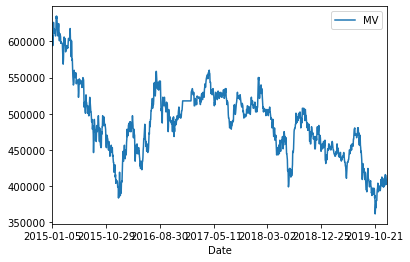

In [11]:
fs2.df[['MV']].plot()

In [12]:
#na_count = df_all.isnull().sum()
for k, v in fs2.df.isnull().sum().items():
    if v>0:
        print(k,v)

In [13]:
fs2.df[fs2.df['volume_mfi'].isnull()]

,key_0,Price,MV,VA,VO,DY,Date,Ticker,Sector,Industry,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,


In [14]:
fs2 = StockFS2('BLAND')

In [15]:
fs2.df

,key_0,Price,MV,VA,VO,DY,Date,Ticker,Sector,Industry,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,2015-01-05,1.56,32233.22,77696.9,49653.9,3.85,2015-01-05,BLAND,Property Development,Property & Construction,...,-69.565249,-0.212147,1.659667,-1.265829,-19.395150,-8.053811,-11.341339,-1.265829,-1.273909,11.428569
2015-01-06,2015-01-06,1.59,32853.09,147156.5,93809.1,3.77,2015-01-06,BLAND,Property Development,Property & Construction,...,-56.521732,-0.209765,1.654222,-0.624999,-17.746695,-9.992388,-7.754307,1.923083,1.904825,13.571433
2015-01-07,2015-01-07,1.66,34299.44,197536.7,120618.0,3.61,2015-01-07,BLAND,Property Development,Property & Construction,...,-30.000024,-0.193324,1.654285,0.606060,-13.999308,-10.793772,-3.205536,4.402511,4.308355,18.571428
2015-01-08,2015-01-08,1.67,34506.07,71712.9,43075.5,3.59,2015-01-08,BLAND,Property Development,Property & Construction,...,-27.777807,-0.172765,1.654478,-1.183438,-17.462472,-12.127512,-5.334960,0.602409,0.600602,19.285713
2015-01-09,2015-01-09,1.65,34092.81,83849.9,50696.2,3.64,2015-01-09,BLAND,Property Development,Property & Construction,...,-38.888904,-0.147206,1.654423,0.609756,-19.626825,-13.627375,-5.999451,-1.197604,-1.204833,17.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,2019-12-24,1.37,23802.95,3099.4,2254.9,6.57,2019-12-24,BLAND,Property Development,Property & Construction,...,-59.999988,0.074412,1.721840,3.787875,13.313658,15.620166,-2.306509,-0.724637,-0.727275,-2.142855
2019-12-25,2019-12-25,1.38,23976.69,7192.6,5211.6,6.52,2019-12-25,BLAND,Property Development,Property & Construction,...,-54.999994,0.066265,1.721840,4.545450,6.287019,13.753537,-7.466518,0.729926,0.727275,-1.428570
2019-12-26,2019-12-26,1.36,23629.20,14437.9,10576.7,6.62,2019-12-26,BLAND,Property Development,Property & Construction,...,-64.999982,0.045853,1.721840,3.030300,3.149463,11.632722,-8.483259,-1.449274,-1.459879,-2.857140


In [16]:
fs2.df.columns

Index(['key_0', 'Price', 'MV', 'VA', 'VO', 'DY', 'Date', 'Ticker', 'Sector',
       'Industry', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_mfi',
       'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volume_vwap',
       'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_dif

In [17]:
fs2.df.columns.values

array(['key_0', 'Price', 'MV', 'VA', 'VO', 'DY', 'Date', 'Ticker',
       'Sector', 'Industry', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Adj Close', 'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi',
       'volume_mfi', 'volume_em', 'volume_sma_em', 'volume_vpt',
       'volume_nvi', 'volume_vwap', 'volatility_atr', 'volatility_bbm',
       'volatility_bbh', 'volatility_bbl', 'volatility_bbw',
       'volatility_bbp', 'volatility_bbhi', 'volatility_bbli',
       'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch',
       'volatility_dcm', 'volatility_dcw', 'volatility_dcp',
       'volatility_ui', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow',
       'trend_ema_fast', 'trend_ema_slow', 'trend_adx', 'trend_adx_pos',
       'trend_adx_neg', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
       'trend_

# Compute features and save

In [22]:
stat = pd.DataFrame()
stocks = []
for t in series.keys():
    print("Preparing %s." % t)
    try:
        s1 = StockFS2(t) # Exclude series with less than 1000 observations
        if s1.df['Price'].count() > 1000:
            stocks.append(s1.df)
            print("Added to data set.")
        else:
            print("Not enough observations.")
        stat = stat.append({'ticker':t, 'obs':s1.df['Price'].count()}, ignore_index=True)
    except Exception as e:
        print("Error %s: %s" % (t, str(e)))

Preparing AAV.
Added to data set.
Preparing ADVANC.
Added to data set.
Preparing AEONTS.
Added to data set.
Preparing AMATA.
Added to data set.
Preparing ANAN.
Added to data set.
Preparing AOT.
Added to data set.
Preparing AP.
Added to data set.
Preparing ASP.
Added to data set.
Preparing AWC.
Error AWC: single positional indexer is out-of-bounds
Preparing BA.
Added to data set.
Preparing BANPU.
Added to data set.
Preparing BAY.
Added to data set.
Preparing BBL.
Added to data set.
Preparing BCH.
Added to data set.
Preparing BCP.
Added to data set.
Preparing BCPG.
Not enough observations.
Preparing BDMS.
Added to data set.
Preparing BEAUTY.
Added to data set.
Preparing BEC.
Added to data set.
Preparing BEM.
Not enough observations.
Preparing BGRIM.
Not enough observations.
Preparing BH.
Added to data set.
Preparing BIG.
Not enough observations.
Preparing BJC.
Added to data set.
Preparing BJCHI.
Added to data set.
Preparing BLA.
Added to data set.
Preparing BLAND.
Added to data set.
Prep

In [23]:
print(len(stocks))

110


In [24]:
# Stack dataframes together
# https://stackoverflow.com/questions/29351840/stack-two-pandas-data-frames

df_all = pd.concat(stocks, ignore_index=True)
df_all

,key_0,Price,MV,VA,VO,DY,Date,Ticker,Sector,Industry,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
0,2015-09-01,4.30,20855.00,77303.3,18027.3,2.33,2015-09-01,AAV,Transportation & Logistics,Services,...,-49.999801,0.000000,4.300000,0.000000,0.000000,0.000000,0.000000,-17.772648,0.000000,0.000000
1,2015-09-02,4.36,21145.99,83450.5,19155.2,2.29,2015-09-02,AAV,Transportation & Logistics,Services,...,-24.999925,0.000000,4.328048,0.000000,0.496801,0.099360,0.397441,1.395347,1.385702,1.395347
2,2015-09-03,4.46,21631.00,104942.3,23555.3,2.24,2015-09-03,AAV,Transportation & Logistics,Services,...,-15.384587,0.000000,4.388618,0.000000,2.757028,0.630894,2.126134,2.293576,2.267669,3.720927
3,2015-09-04,4.50,21824.99,69050.4,15468.5,2.22,2015-09-04,AAV,Transportation & Logistics,Services,...,-0.000000,0.000000,4.438915,0.000000,1.033141,0.711343,0.321798,0.896860,0.892862,4.651158
4,2015-09-07,4.46,21631.00,17638.7,3958.8,2.24,2015-09-07,AAV,Transportation & Logistics,Services,...,-15.384587,0.000000,4.448140,0.000000,-5.707498,-0.572425,-5.135073,-0.888888,-0.892862,3.720927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134994,2019-12-24,13.40,5916.91,43853.1,3283.1,3.36,2019-12-24,WORK,Media & Publishing,Services,...,-69.230803,-1.718824,13.970206,-4.285717,-17.993092,-18.920791,0.927698,-1.470594,-1.481514,-17.356904
134995,2019-12-25,13.60,6005.22,25806.5,1918.2,3.31,2019-12-25,WORK,Media & Publishing,Services,...,-53.846131,-1.580588,13.951800,-2.158268,-18.634808,-18.863594,0.228786,1.492543,1.481514,-16.123420
134996,2019-12-26,13.90,6137.69,26514.5,1907.0,3.24,2019-12-26,WORK,Media & Publishing,Services,...,-30.769270,-1.358235,13.949225,5.303029,-19.059525,-18.902780,-0.156744,2.205877,2.181899,-14.273206
134997,2019-12-27,14.10,6226.00,22389.9,1587.2,3.19,2019-12-27,WORK,Media & Publishing,Services,...,-15.384598,-1.135882,13.953622,7.633588,-20.348335,-19.191891,-1.156444,1.438854,1.428601,-13.039723


In [26]:
df_all.to_csv('_fs2.csv.gz')

In [29]:
na_count = df_all.isnull().sum()
na_count.keys()

Index(['key_0', 'Price', 'MV', 'VA', 'VO', 'DY', 'Date', 'Ticker', 'Sector',
       'Industry', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_mfi',
       'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volume_vwap',
       'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_dif

In [ ]:
for k, v in na_count.items():
    print(k,v)

In [ ]:
df_all[df_all['volume_vwap'].isnull()]

In [28]:
stat

""
